<a href="https://colab.research.google.com/github/mashrukh-zaman/BanglaNet/blob/main/FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


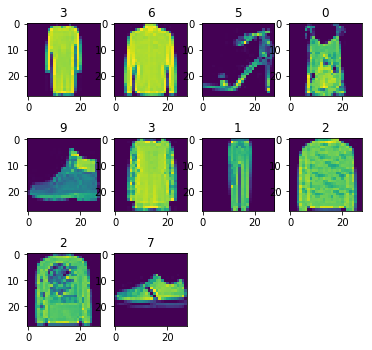

In [ ]:
a=[25,39,8,67,90,5120,1000,234,1267,132]
plt.figure(figsize=(6,6))
for i in range(len(a)):
    plt.subplot(3,4,i+1)
    plt.imshow(x_train[a[i]])
    plt.title(y_train[a[i]])

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255
x_test=x_test/255

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
__________

In [ ]:
model.fit(x_train,y_train,batch_size=60,epochs=15,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 846s 18ms/step - loss: 0.5252 - acc: 0.8099 - val_loss: 0.3775 - val_acc: 0.8630
Epoch 2/15
48000/48000 [==============================] - 1037s 22ms/step - loss: 0.3492 - acc: 0.8719 - val_loss: 0.3120 - val_acc: 0.8840
Epoch 3/15
48000/48000 [==============================] - 991s 21ms/step - loss: 0.3018 - acc: 0.8887 - val_loss: 0.2861 - val_acc: 0.8972
Epoch 4/15
48000/48000 [==============================] - 904s 19ms/step - loss: 0.2727 - acc: 0.8994 - val_loss: 0.2755 - val_acc: 0.8976
Epoch 5/15
48000/48000 [==============================] - 861s 18ms/step - loss: 0.2503 - acc: 0.9080 - val_loss: 0.2820 - val_acc: 0.8961
Epoch 6/15
48000/48000 [==============================] - 942s 20ms/step - loss: 0.2293 - acc: 0.9152 - val_loss: 0.2498 - val_acc: 0.9088
Epoch 7/15
48000/48000 [==============================] - 967s 20ms/step - loss: 0.2137 - acc: 0.9190 - val_loss: 0

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('testloss',test_loss)
print('test accuracy',test_acc)

10000/10000 [==============================] - 10s 1ms/step
testloss 0.2637318471550941
test accuracy 0.9114


In [ ]:
num=115
prediction=model.predict(x_test)
print(np.argmax(np.round(prediction[num])))

2


The Label is '[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]'


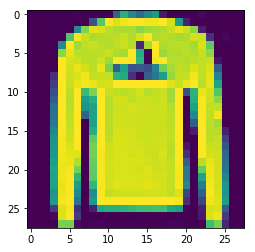

In [ ]:
plt.imshow(x_test[num].reshape(28,28))
print("The Label is '{}'".format(y_test[num]))
plt.show()